<h1><center>A2 - Regression Model Development</center></h1>
<h4>Computational Data Analytics with Python- DAT-5390-FMBAN1</h4>
Dennis Otieno<br>
Professor - Chase Kusterer<br>
Hult International Business School<br>
<h4>Introduction</h4><br>
The food industry, especially the fast-food sector is becoming competitive with new players entering the market. According to the US Bureau of Labor Statistics 2023, many US citizens spend an average of their income on takeout, in-restaurant dining, and fast-food meals. Therefore, it is critical to understand Apprentice Chef customers' behavior, how it contributes to revenue and eventually how it can help Apprentice Chef stay competitive in the market.<br>
<br>
Apprentice Chef is a company that offers a wide variety of daily prepared meals, developed to target busy professionals that has no skills in cooking and are always busy to cook at home. Each of their meal sets takes approximately 30 minutes to prepare and they have a user-friendly online and mobile platforms to aid in ordering. 
<h4>Objective</h4>
The aim of this regression model development is to better understand how much revenue to expect from each customer within their first year of orders. In order to achieve this, I'll analyze their dataset, develop my good insights from the dataset, and build models from my best insights to predict revenue over the first year period.<br>
<h4>Data Exploration</h4>

In [1]:
# importing libraries and packages
import pandas                      as pd# data science essentials
import matplotlib.pyplot           as plt # essential graphical output
import seaborn                     as sns# enhanced graphical output
import statsmodels.formula.api     as smf # regression modeling
import numpy                       as np # mathematical essentials
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression

# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
chef = pd.read_excel(io = file)

# outputting the first ten rows of the dataset
chef.head(n=10)


,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


In [2]:
#checking for column general information
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [3]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(decimals = 2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [4]:
#checking for skewness of the numerical data
chef.skew().round(2)

C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\4146272442.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chef.skew().round(2)


REVENUE                        1.63
TOTAL_MEALS_ORDERED            2.01
UNIQUE_MEALS_PURCH             0.57
CONTACTS_W_CUSTOMER_SERVICE    0.37
PRODUCT_CATEGORIES_VIEWED      0.16
AVG_TIME_PER_SITE_VISIT        1.20
CANCELLATIONS_AFTER_NOON       1.44
PC_LOGINS                     -0.04
MOBILE_LOGINS                  0.05
WEEKLY_PLAN                    1.54
LATE_DELIVERIES                1.71
AVG_PREP_VID_TIME              9.64
LARGEST_ORDER_SIZE             0.70
AVG_MEAN_RATING               -0.11
TOTAL_PHOTOS_VIEWED            2.60
dtype: float64

In [5]:
# descriptive statistics for numeric data
chef.describe(include = 'object').round(decimals = 2)

,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
count,1946,1946,1946,1900
unique,1946,1946,1442,1070
top,Steffon Baratheon,steffon.baratheon@yahoo.com,Jon,Frey
freq,1,1,21,79


<h4>Data exploration - Assumptions on variable types</h4>
Looking at the different variables in the original dataset and the general description of the Apprentice Dataset, I can assume only 5 continuous variables, 4 variables that are categorical and many interval variables. Among the categorical data, 3 variables namely name, first name and family name will be removed since they are distinct countable variables.<br>
<br>
A skewness greater than 1 or less than -1 is considered a bad skew. A number of numerical data in the Apprentice_Dataset has a bad skew and will have to be cleaned to build good insights with revenue. 

<h4>Data exploration - Checking For Missing Values and Filling them</h4>
<br>
Working with a full data set is important when building the analysis. I'll start by checking the missing values in the data set and fill them.

In [6]:
# taking the chef dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
chef.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [7]:
#only the column family name has 46 missing values
#filling the null values in family name with unknown
chef=chef.fillna("Unknown")


In [8]:
#Checking if there are other missing values remaining
chef.isna().any().sum()

0

<h4>Dealing With Continuous Data</h4>
The following assumptions can be engineered to build new insights:<br>
<br>
1. Since most of our customers are professionals who are constantly busy, they might consider total time taken to prepare the total order set they purchase.<br>
Total_Prep_Time_InOrders = Avg_Prep_Vid_Time * Total_Meals_Ordered
<br>
2. The time taken by a customer to view the meals photos will impact his or her purchasing power.<br>
Total_Time_InPhotos = Avg_Time_Per_Site_Visit * Total_Photos_Viewed

In [9]:
#engineering total prep video time in a customer's order
chef['Total_Prep_Time_InOrders'] = chef['AVG_PREP_VID_TIME'] * chef['TOTAL_MEALS_ORDERED']
# developing a correlation matrix
prep_corr = chef.loc[ : , ['TOTAL_MEALS_ORDERED',
                              'AVG_PREP_VID_TIME',
                              'Total_Prep_Time_InOrders',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations Total_Prep_Time_InOrders
print(f"""
Meal Prep Time
=========
---------------------
Prep Time Correlations
---------------------
{prep_corr['REVENUE']}

""")
#engineering total time spent in photos viewed
chef['Total_Time_InPhotos'] = chef['AVG_TIME_PER_SITE_VISIT'] * chef['TOTAL_PHOTOS_VIEWED']
# developing a correlation matrix
Time_corr = chef.loc[ : , ['AVG_TIME_PER_SITE_VISIT',
                              'TOTAL_PHOTOS_VIEWED',
                              'Total_Time_InPhotos',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations Total_Time_InPhotos
print(f"""
Total_Time_InPhotos
=========
---------------------
Time in Photos Correlations
---------------------
{Time_corr['REVENUE']}

""")


Meal Prep Time
---------------------
Prep Time Correlations
---------------------
TOTAL_MEALS_ORDERED         0.60
AVG_PREP_VID_TIME           0.14
Total_Prep_Time_InOrders    0.53
REVENUE                     1.00
Name: REVENUE, dtype: float64



Total_Time_InPhotos
---------------------
Time in Photos Correlations
---------------------
AVG_TIME_PER_SITE_VISIT    0.64
TOTAL_PHOTOS_VIEWED        0.46
Total_Time_InPhotos        0.51
REVENUE                    1.00
Name: REVENUE, dtype: float64




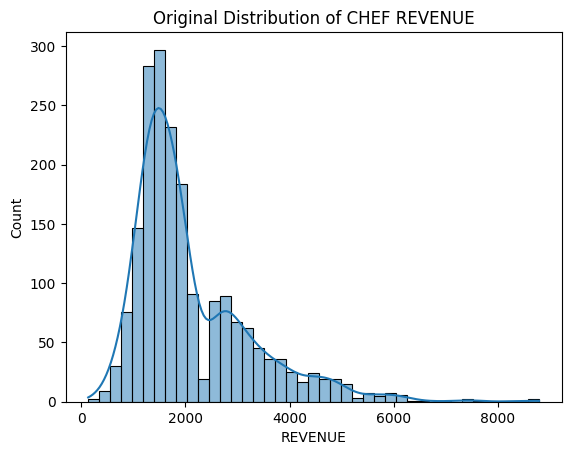

In [10]:
# developing a histogram using HISTPLOT for the y_variable revenue 
sns.histplot(data  = chef,
         x     = 'REVENUE',
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of CHEF REVENUE")
plt.xlabel(xlabel = "REVENUE") # dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\710528545.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\710528545.py:70: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


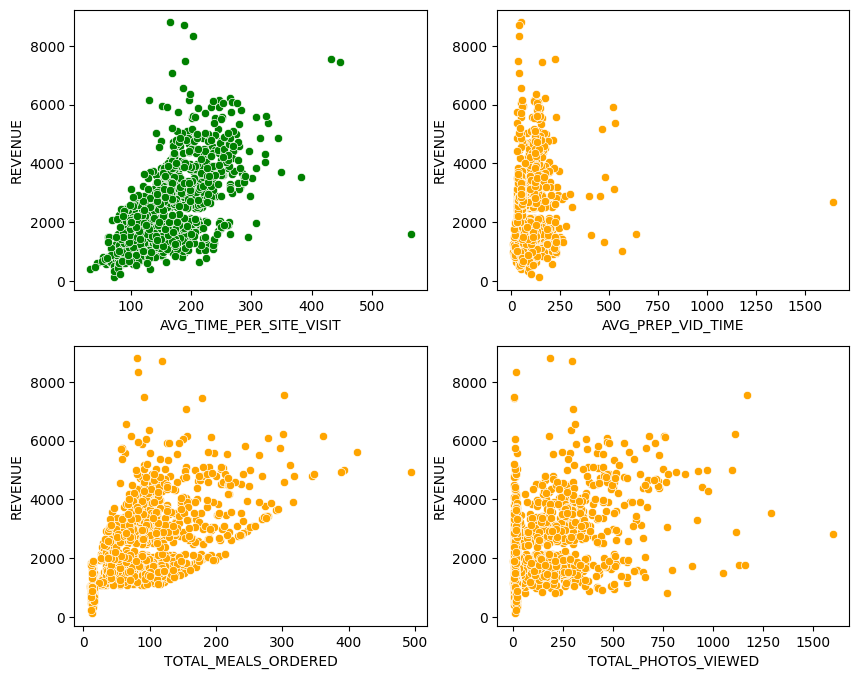

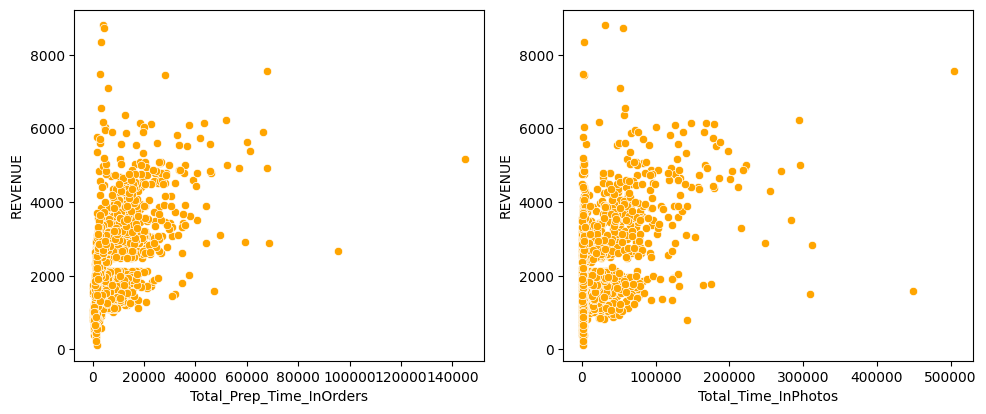

In [11]:
#scatterplots to show the relationship of continuous variables with revenue 
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


########################

# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))
# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['Total_Prep_Time_InOrders'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total_Prep_Time_InOrders')
plt.ylabel(ylabel = 'REVENUE')


########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['Total_Time_InPhotos'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total_Time_InPhotos')
plt.ylabel(ylabel = 'REVENUE')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [12]:
# creating a list of continuous features (including Revenue)
continuous_data = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'TOTAL_PHOTOS_VIEWED',
                  'Total_Time_InPhotos', 'Total_Prep_Time_InOrders']


# developing a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Revenue
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                     1.00
AVG_TIME_PER_SITE_VISIT     0.64
TOTAL_MEALS_ORDERED         0.60
Total_Prep_Time_InOrders    0.53
Total_Time_InPhotos         0.51
TOTAL_PHOTOS_VIEWED         0.46
AVG_PREP_VID_TIME           0.14
Name: REVENUE, dtype: float64

In [13]:
# importing an additional package
import statsmodels.formula.api as smf 
# building a base model with the continuous variables

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  REVENUE ~ AVG_TIME_PER_SITE_VISIT + AVG_PREP_VID_TIME + TOTAL_MEALS_ORDERED
                                               + TOTAL_PHOTOS_VIEWED + Total_Time_InPhotos + Total_Prep_Time_InOrders""",
                                     data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     391.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:05   Log-Likelihood:                -15683.
No. Observations:                1946   AIC:                         3.138e+04
Df Residuals:                    1939   BIC:                         3.142e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<h4>Findings On Continuous Data</h4>   
<p>The revenue is right skewed and the continuous variables does not show a clear linearity with the revenue. The correlation is good as they have a positive impact on the revenue with average prepared video time having a low correlation. However the R-squared in the OLS model is low. The continuous variables will be transformed through logarithm to see if the R-square will improve.
</p>
<br>
Logarithmic is going to be applied. The distribution of continuous variables is badly skewed. By treating these skewness with a log transformation, we normalize the magnitude of smaller and larger variables. In other words, lower variables are expanded in our analysis and higher variables are compressed.

In [14]:
#log transformation since all continuous data have a bad skewness(more than 1)
# log transforming Revenue and saving it to the dataset
chef['log_REVENUE'] = np.log(chef['REVENUE'])
# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])
# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'])
# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])
# log transforming TOTAL_PHOTOS_VIEWED and saving it to the dataset
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'])
# log transforming Total_Time_InPhotos and saving it to the dataset
chef['log_Total_Time_InPhotos'] = np.log(chef['Total_Time_InPhotos'])
# log transforming Total_Prep_Time_InOrders and saving it to the datase
chef['log_Total_Prep_Time_InOrders'] = np.log(chef['Total_Prep_Time_InOrders'])

In [15]:
#comparing the new skewness of the transformed variable revenue
print(f"""
{chef[ ['REVENUE', 'log_REVENUE' ] ].skew()}

{chef[ ['AVG_PREP_VID_TIME', 'log_AVG_PREP_VID_TIME' ] ].skew()}

{chef[ ['AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT' ] ].skew()}

{chef[ ['TOTAL_MEALS_ORDERED', 'log_TOTAL_MEALS_ORDERED' ] ].skew()}

{chef[ ['TOTAL_PHOTOS_VIEWED', 'log_TOTAL_PHOTOS_VIEWED' ] ].skew()}

{chef[ ['Total_Time_InPhotos', 'log_Total_Time_InPhotos' ] ].skew()}

{chef[ ['Total_Prep_Time_InOrders', 'log_Total_Prep_Time_InOrders' ] ].skew()}""")


REVENUE        1.626573
log_REVENUE    0.184090
dtype: float64

AVG_PREP_VID_TIME        9.639388
log_AVG_PREP_VID_TIME   -0.490844
dtype: float64

AVG_TIME_PER_SITE_VISIT        1.200283
log_AVG_TIME_PER_SITE_VISIT   -0.063739
dtype: float64

TOTAL_MEALS_ORDERED        2.006653
log_TOTAL_MEALS_ORDERED   -0.283446
dtype: float64

TOTAL_PHOTOS_VIEWED        2.604685
log_TOTAL_PHOTOS_VIEWED    0.400043
dtype: float64

Total_Time_InPhotos        4.267641
log_Total_Time_InPhotos    0.449541
dtype: float64

Total_Prep_Time_InOrders        4.582761
log_Total_Prep_Time_InOrders   -0.297491
dtype: float64


C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\884651813.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\884651813.py:69: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


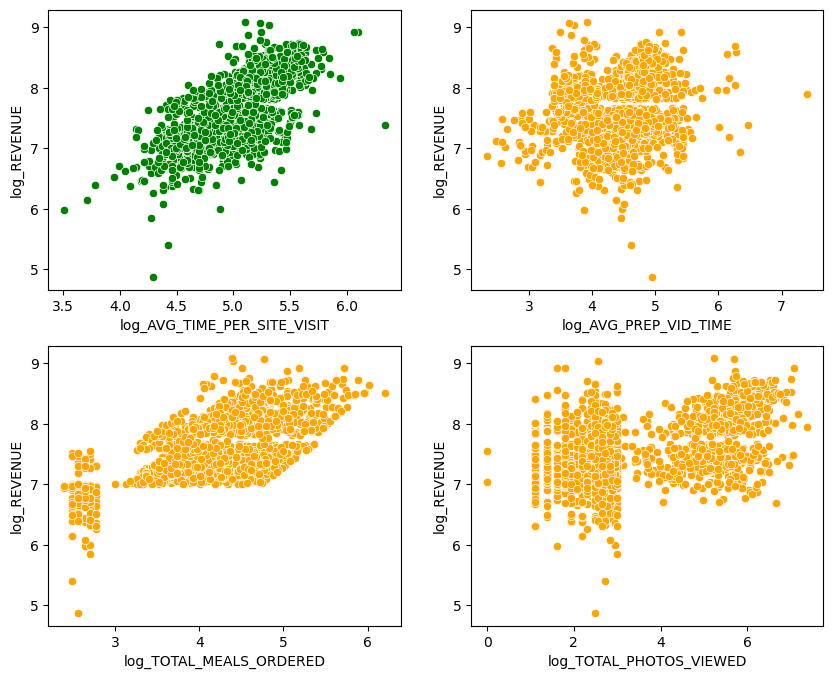

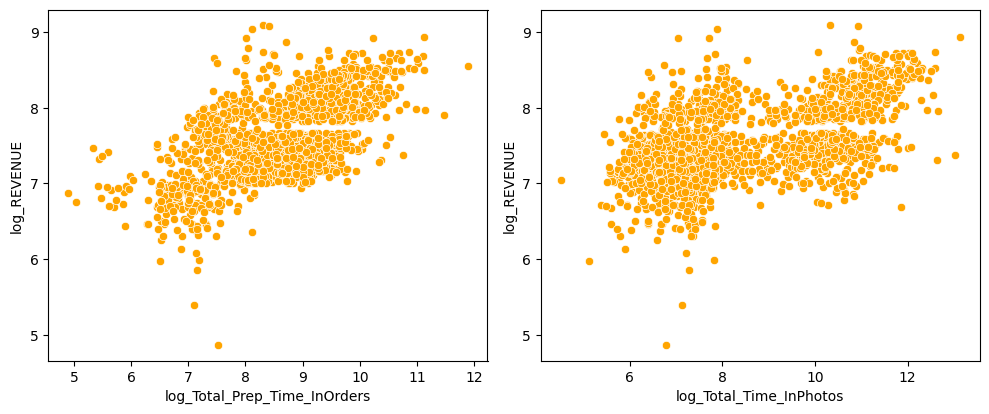

In [16]:
#visualization of the new transformed continuous data with scatterplots
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['log_AVG_TIME_PER_SITE_VISIT'],
                y = chef['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'log_REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['log_AVG_PREP_VID_TIME'],
                y = chef['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'log_REVENUE')


########################
# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['log_TOTAL_MEALS_ORDERED'],
                y = chef['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'log_REVENUE')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['log_TOTAL_PHOTOS_VIEWED'],
                y = chef['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'log_REVENUE')


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))
# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['log_Total_Prep_Time_InOrders'],
                y = chef['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_Total_Prep_Time_InOrders')
plt.ylabel(ylabel = 'log_REVENUE')


########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['log_Total_Time_InPhotos'],
                y = chef['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_Total_Time_InPhotos')
plt.ylabel(ylabel = 'log_REVENUE')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [17]:

# building a base model with the new log variables

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT + log_AVG_PREP_VID_TIME + log_TOTAL_PHOTOS_VIEWED
                                                   + log_TOTAL_MEALS_ORDERED + log_Total_Time_InPhotos + log_Total_Prep_Time_InOrders""",
                                     data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     821.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:06   Log-Likelihood:                -399.67
No. Observations:                1946   AIC:                             809.3
Df Residuals:                    1941   BIC:                             837.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

<h4>Findings After Log Transformation</h4>
The log transformation has increased the R-squared which is good for our regression modeling.

<h4>Working with with Interval and Count Data</h4><br>
<p>A good way to represent interval data is through boxplots. Each Interval data will be plotted with both revenue and log_revenue to see if a straight line can be drawn that passes at the median of each interval. If this is not achieved, a feature engineering will be performed on every interval data that has not met this condition.</p>
<br>
<p>Below is a representation of all the boxplots of each interval data and the distributions in a simple print statement.</p>

In [18]:
#Exploring the distribution of data in my interval data
print(f"""
LARGEST_ORDER_SIZE 
-------------
{chef['LARGEST_ORDER_SIZE'].value_counts().sort_index()}

AVG_MEAN_RATING
-------------
{chef['AVG_MEAN_RATING'].value_counts().sort_index()}

UNIQUE_MEALS_PURCH
-------------
{chef['UNIQUE_MEALS_PURCH'].value_counts().sort_index()}

PRODUCT_CATEGORIES_VIEWED
-------------
{chef['PRODUCT_CATEGORIES_VIEWED'].value_counts().sort_index()}

CANCELLATIONS_AFTER_NOON
-------------
{chef['CANCELLATIONS_AFTER_NOON'].value_counts().sort_index()}

CONTACTS_W_CUSTOMER_SERVICE
-------------
{chef['CONTACTS_W_CUSTOMER_SERVICE'].value_counts().sort_index()}

PC_LOGINS
-------------
{chef['PC_LOGINS'].value_counts().sort_index()}

MOBILE_LOGINS
-------------
{chef['MOBILE_LOGINS'].value_counts().sort_index()}

WEEKLY_PLAN
-------------
{chef['WEEKLY_PLAN'].value_counts().sort_index()}

LATE_DELIVERIES
-------------
{chef['LATE_DELIVERIES '].value_counts().sort_index()}
""")



LARGEST_ORDER_SIZE 
-------------
1      17
2     135
3     391
4     547
5     449
6     236
7      89
8      49
9      20
10     12
11      1
Name: LARGEST_ORDER_SIZE, dtype: int64

AVG_MEAN_RATING
-------------
1.315789      2
1.578947      2
1.842105      2
2.105263     27
2.368421     64
2.631579     92
2.894737    175
3.157895    267
3.421053    358
3.684211    312
3.947368    250
4.210526    169
4.473684    148
4.736842     64
5.000000     14
Name: AVG_MEAN_RATING, dtype: int64

UNIQUE_MEALS_PURCH
-------------
1       1
2       8
3      53
4     180
5     292
6     356
7     378
8     256
9     138
10     68
11    121
12     92
13      1
16      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

PRODUCT_CATEGORIES_VIEWED
-------------
1     162
2     313
3     253
4     146
5     156
6     153
7     170
8     166
9     140
10    287
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64

CANCELLATIONS_AFTER_NOON
-------------
0     572
1     583
2     336
3     224
4     121
5      58

C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\619779769.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\619779769.py:65: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)
C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\619779769.py:119: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 1)
C:\Users\domuy\AppData\Local\Temp\ipykernel_44912\619779769.py:173: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly c

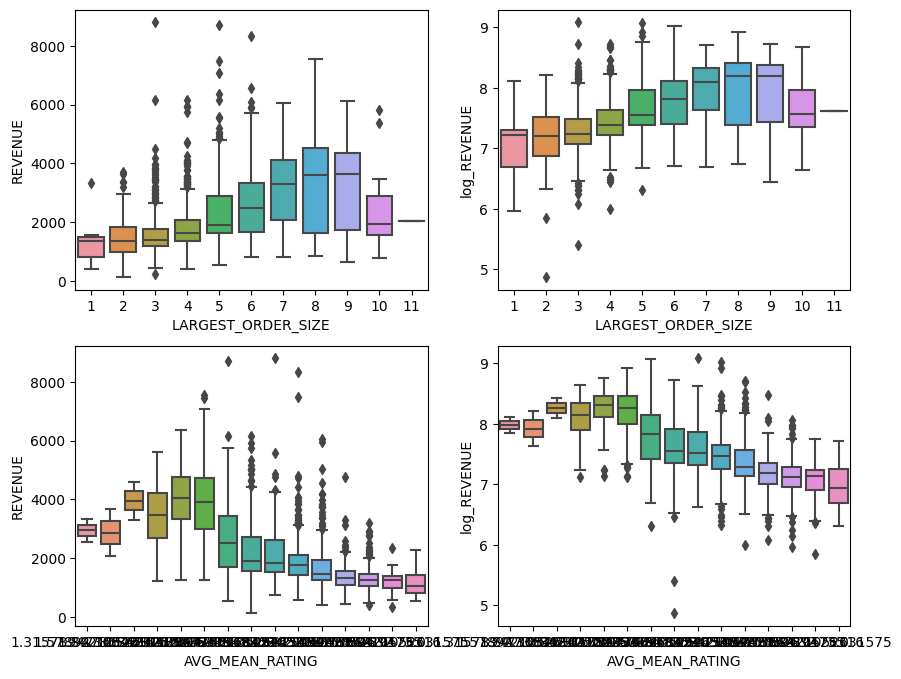

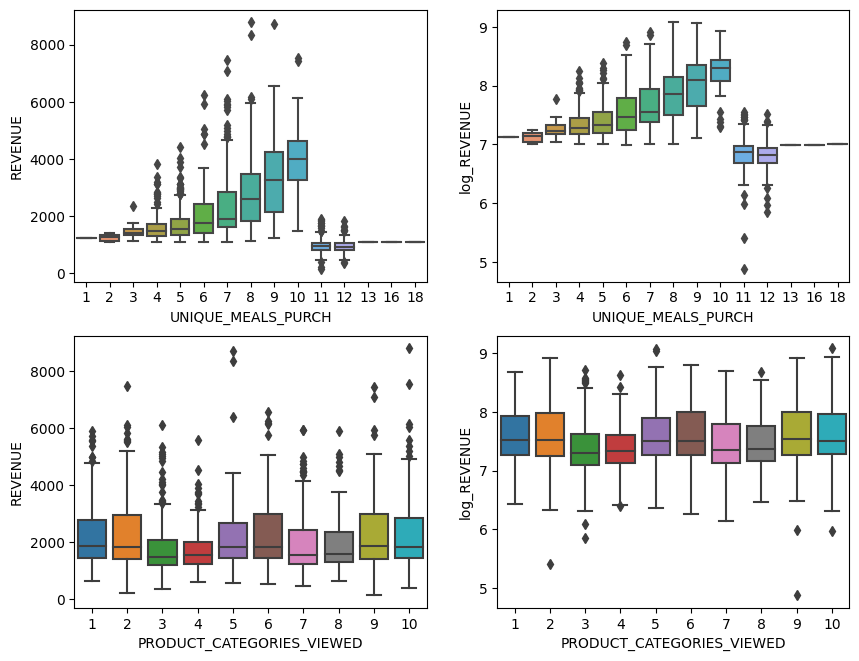

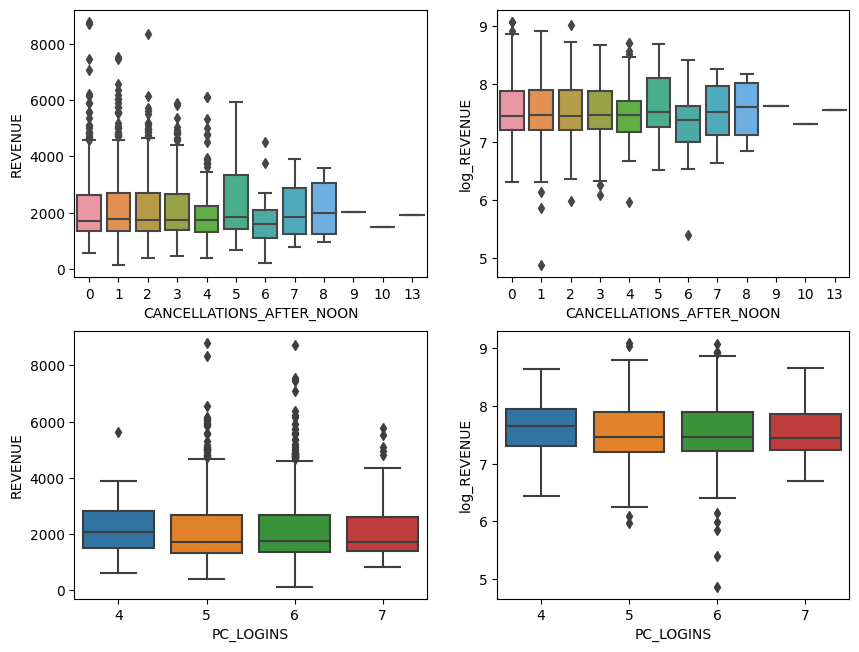

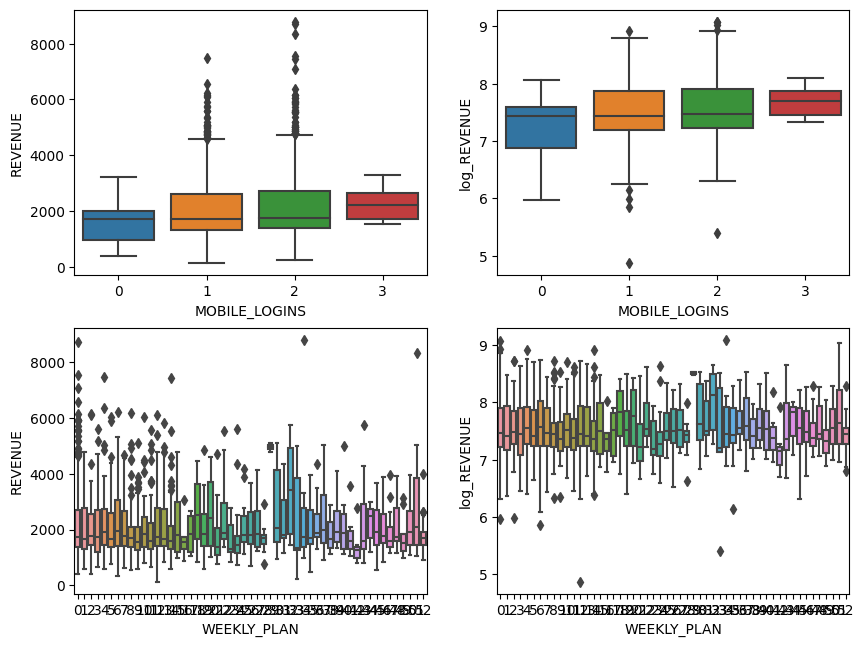

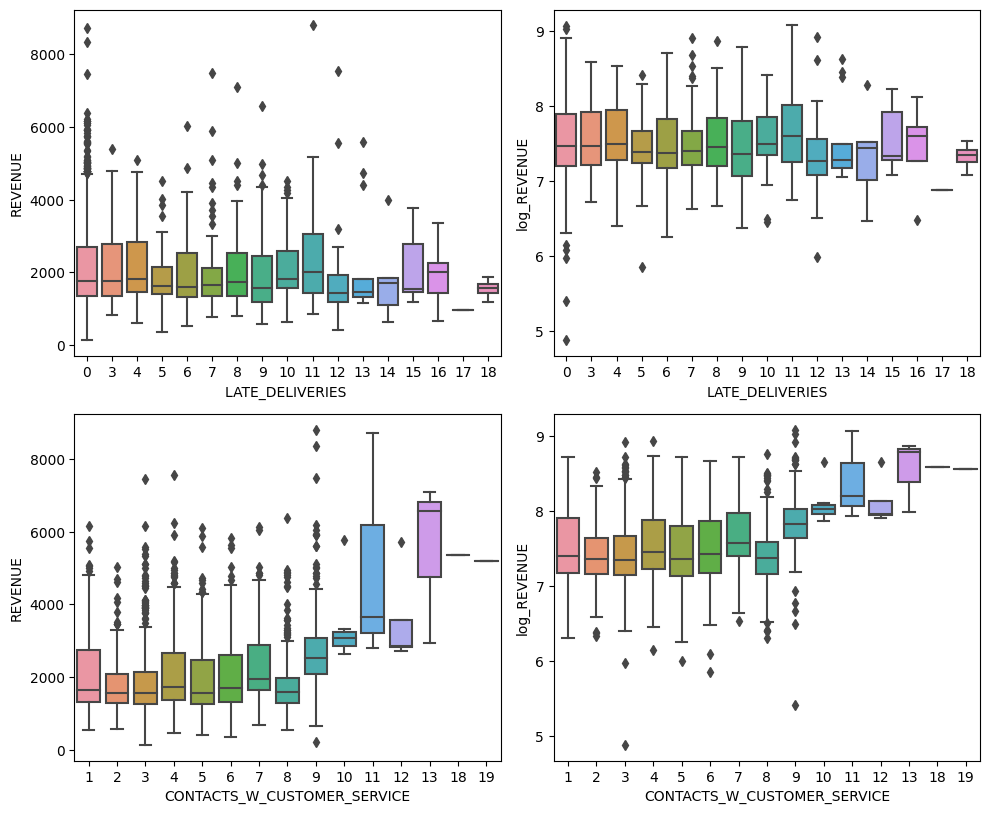

In [19]:
########################
# Visual EDA (boxplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# boxplot - LARGEST_ORDER_SIZE and revenue
plt.subplot(2, 2, 1)
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

########################

# boxplot - LARGEST_ORDER_SIZE and log_revenue
plt.subplot(2, 2, 2)
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# boxplot - AVG_MEAN_RATING and revenue
plt.subplot(2, 2, 3)
sns.boxplot(x    = 'AVG_MEAN_RATING',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - AVG_MEAN_RATING and log_revenue
plt.subplot(2, 2, 4)
sns.boxplot(x    = 'AVG_MEAN_RATING',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# boxplot - UNIQUE_MEALS_PURCH and revenue
plt.subplot(3, 2, 1)
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - UNIQUE_MEALS_PURCH and log_revenue
plt.subplot(3, 2, 2)
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# boxplot - PRODUCT_CATEGORIES_VIEWED and revenue
plt.subplot(3, 2, 3)
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - PRODUCT_CATEGORIES_VIEWED and log_revenue
plt.subplot(3, 2, 4)
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 16))
# boxplot - CANCELLATIONS_AFTER_NOON and revenue
plt.subplot(4, 2, 1)
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - CANCELLATIONS_AFTER_NOON and log_revenue
plt.subplot(4, 2, 2)
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'log_REVENUE')


########################

# boxplot - PC_LOGINS and revenue
plt.subplot(4, 2, 3)
sns.boxplot(x    = 'PC_LOGINS',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - PC_LOGINS and log_revenue
plt.subplot(4, 2, 4)
sns.boxplot(x    = 'PC_LOGINS',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'log_REVENUE')
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 20))
# boxplot - MOBILE_LOGINS and revenue
plt.subplot(5, 2, 1)
sns.boxplot(x    = 'MOBILE_LOGINS',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - MOBILE_LOGINS and log_revenue
plt.subplot(5, 2, 2)
sns.boxplot(x    = 'MOBILE_LOGINS',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# boxplot - WEEKLY_PLAN and revenue
plt.subplot(5, 2, 3)
sns.boxplot(x    = 'WEEKLY_PLAN',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - WEEKLY_PLAN and log_revenue
plt.subplot(5, 2, 4)
sns.boxplot(x    = 'WEEKLY_PLAN',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 24))
# boxplot - LATE_DELIVERIES and revenue
plt.subplot(6, 2, 1)
sns.boxplot(x    = 'LATE_DELIVERIES ',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'LATE_DELIVERIES ')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - LATE_DELIVERIES and log_revenue
plt.subplot(6, 2, 2)
sns.boxplot(x    = 'LATE_DELIVERIES ',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# boxplot - CONTACTS_W_CUSTOMER_SERVICE and revenue
plt.subplot(6, 2, 3)
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

########################
           
# boxplot - CONTACTS_W_CUSTOMER_SERVICE and log_revenue
plt.subplot(6, 2, 4)
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'log_REVENUE',
                data = chef)


#axis labels
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'log_REVENUE')

########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

Despite having a boxplot presentation of all the interval data with both revenue and log_revenue, none of the interval data has accomplished the straight line rule between the median of each boxplot. Instead, we still have outliers in our data. These can be treated by doing feature engineering with our interval data. 

<h4>Feature Engineering Interval Data</h4>
<br>
The following assumptions will result into new features in our datasets:<br>
1. Total logins of each customer by adding mobile and pc logins. Separated entries for each customer is not necessary.<br>
2. Average total time spent in sites by each customer with regard to total logins.<br>
3. Total orders for the whole period by multiplying Total order set by largest order size.<br>
4. Average unique orders by a customer by dividing total orders for the period by unique orders purchased.<br>
5. Average photos viewed per product category viewed.<br>
6. Weekly plan will be engineered into categorical with customers having weekly plan and those without.<br>
7. Average meal rating will also fall under categorical with low, ,medium and high ratings.


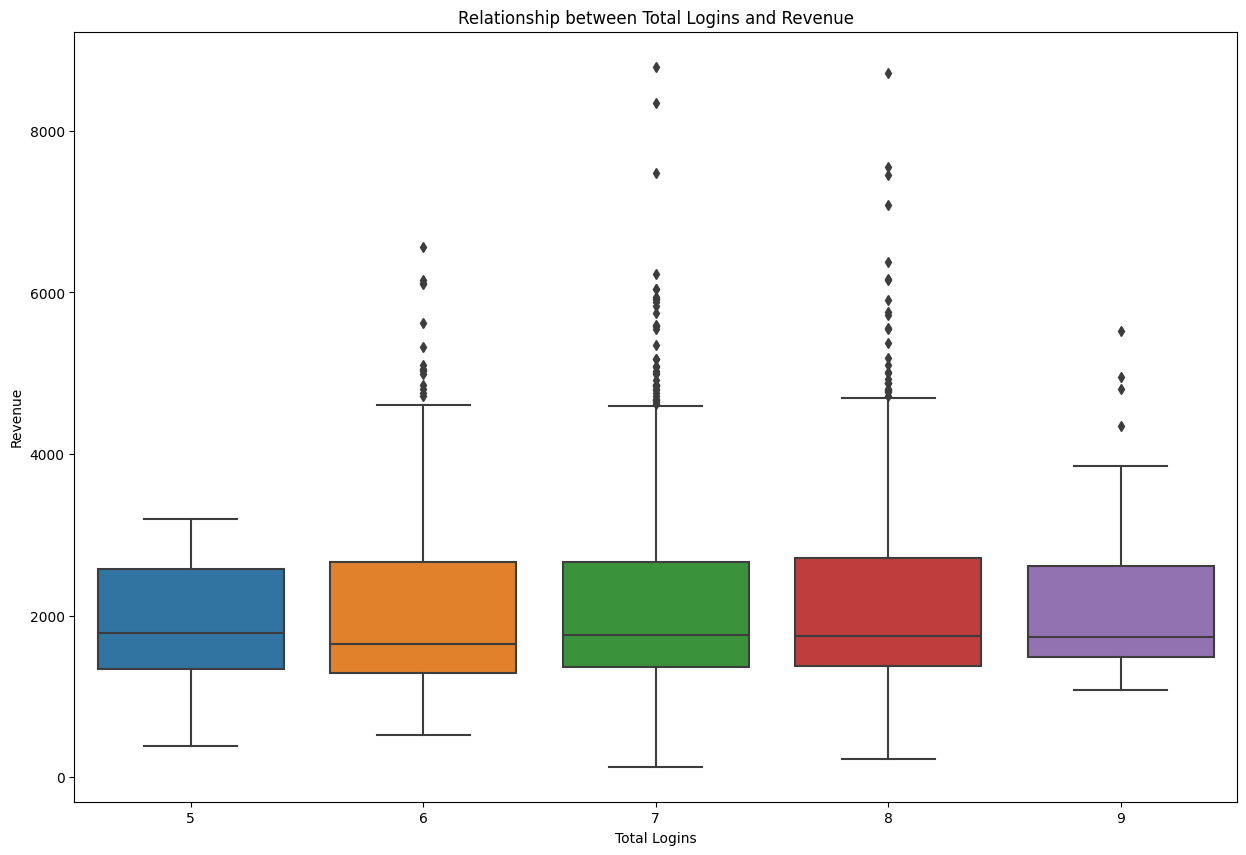


Logins

-----------
Total Logins
-----------
5     30
6    487
7    927
8    472
9     30
Name: Total_Logins, dtype: int64


---------------------
Logins Correlations
---------------------
PC_LOGINS        0.02
MOBILE_LOGINS    0.07
Total_Logins     0.06
REVENUE          1.00
Name: REVENUE, dtype: float64




In [20]:
# total logins
chef['Total_Logins'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Logins',
            y    = 'REVENUE',
            data = chef)



# titles and labels
plt.title(label   = 'Relationship between Total Logins and Revenue')
plt.xlabel(xlabel = 'Total Logins')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.tight_layout
plt.show()

# developing a correlation matrix
logins_corr = chef.loc[ : , ['PC_LOGINS',
                              'MOBILE_LOGINS',
                              'Total_Logins',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations logins
print(f"""
Logins
=========

-----------
Total Logins
-----------
{chef['Total_Logins'].value_counts(normalize = False).sort_index()}


---------------------
Logins Correlations
---------------------
{logins_corr['REVENUE']}

""")

In [21]:
#Average total time spent in sites by each customer with regard to total logins.
chef['Total_Time_in_Sites'] = chef['AVG_TIME_PER_SITE_VISIT'] * chef['Total_Logins']
# developing a correlation matrix
sites_corr = chef.loc[ : , ['PC_LOGINS',
                              'MOBILE_LOGINS',
                              'Total_Logins',
                              'Total_Time_in_Sites',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations logins
print(f"""
Logins
=========

-----------
Total Logins
-----------
{chef['Total_Logins'].value_counts(normalize = False).sort_index()}


---------------------
Logins Correlations
---------------------
{sites_corr['REVENUE']}

""")


Logins

-----------
Total Logins
-----------
5     30
6    487
7    927
8    472
9     30
Name: Total_Logins, dtype: int64


---------------------
Logins Correlations
---------------------
PC_LOGINS              0.02
MOBILE_LOGINS          0.07
Total_Logins           0.06
Total_Time_in_Sites    0.62
REVENUE                1.00
Name: REVENUE, dtype: float64




In [22]:
#feature engineering with largest order size
#Total orders for the whole period by multiplying Total order set by largest order size.
chef['Orders_For_The_Period'] = chef['TOTAL_MEALS_ORDERED'] * chef['LARGEST_ORDER_SIZE']
# developing a correlation matrix
period_corr = chef.loc[ : , ['TOTAL_MEALS_ORDERED',
                              'LARGEST_ORDER_SIZE',
                              'Orders_For_The_Period',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations Orders for the whole period
print(f"""
Orders
=========

-----------
LARGEST_ORDER_SIZE
-----------
{chef['LARGEST_ORDER_SIZE'].value_counts(normalize = False).sort_index()}


---------------------
Orders Correlations
---------------------
{period_corr['REVENUE']}

""")


Orders

-----------
LARGEST_ORDER_SIZE
-----------
1      17
2     135
3     391
4     547
5     449
6     236
7      89
8      49
9      20
10     12
11      1
Name: LARGEST_ORDER_SIZE, dtype: int64


---------------------
Orders Correlations
---------------------
TOTAL_MEALS_ORDERED      0.60
LARGEST_ORDER_SIZE       0.44
Orders_For_The_Period    0.64
REVENUE                  1.00
Name: REVENUE, dtype: float64




In [23]:
#feature engineering with UNIQUE_MEALS_PURCH
#Average unique orders by a customer by dividing total orders for the period by unique orders purchased.
chef['Avg_Unique_Orders'] = chef['Orders_For_The_Period']/ chef['UNIQUE_MEALS_PURCH'] 
# developing a correlation matrix
unique_corr = chef.loc[ : , ['Orders_For_The_Period',
                              'UNIQUE_MEALS_PURCH',
                              'Avg_Unique_Orders',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations average UNIQUE_MEALS_PURCH for the whole period
print(f"""
Unique Purch
=========

-----------
UNIQUE_MEALS_PURCH
-----------
{chef['UNIQUE_MEALS_PURCH'].value_counts(normalize = False).sort_index()}


---------------------
Orders Correlations
---------------------
{unique_corr['REVENUE']}

""")


Unique Purch

-----------
UNIQUE_MEALS_PURCH
-----------
1       1
2       8
3      53
4     180
5     292
6     356
7     378
8     256
9     138
10     68
11    121
12     92
13      1
16      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64


---------------------
Orders Correlations
---------------------
Orders_For_The_Period    0.64
UNIQUE_MEALS_PURCH       0.10
Avg_Unique_Orders        0.50
REVENUE                  1.00
Name: REVENUE, dtype: float64




In [24]:
#feature engineering with PRODUCT_CATEGORIES_VIEWED
#Average photos viewed per product catergory viewed.s
chef['Avg_Photos_PerCategory'] = chef['TOTAL_PHOTOS_VIEWED']/ chef['PRODUCT_CATEGORIES_VIEWED'] 
# developing a correlation matrix
photos_corr = chef.loc[ : , ['TOTAL_PHOTOS_VIEWED',
                              'PRODUCT_CATEGORIES_VIEWED',
                              'Avg_Photos_PerCategory',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations Average photos PRODUCT_CATEGORIES_VIEWED
print(f"""
Avg_Photos_PerCategory
=========

-----------
PRODUCT_CATEGORIES_VIEWED
-----------
{chef['PRODUCT_CATEGORIES_VIEWED'].value_counts(normalize = False).sort_index()}


---------------------
PRODUCT_CATEGORIES_VIEWED Correlations
---------------------
{photos_corr['REVENUE']}

""")


Avg_Photos_PerCategory

-----------
PRODUCT_CATEGORIES_VIEWED
-----------
1     162
2     313
3     253
4     146
5     156
6     153
7     170
8     166
9     140
10    287
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64


---------------------
PRODUCT_CATEGORIES_VIEWED Correlations
---------------------
TOTAL_PHOTOS_VIEWED          0.46
PRODUCT_CATEGORIES_VIEWED    0.03
Avg_Photos_PerCategory       0.32
REVENUE                      1.00
Name: REVENUE, dtype: float64




In [25]:
#Weekly plan will be engineered into categorical with customers having weekly plan and those without
chef['Classification_Weekly'] = 0

#Assigning values to each quality category
for index, value in chef.iterrows():
    if chef.loc[index, "WEEKLY_PLAN"] == 0:
        #customers without weekly plan
        chef.loc[index, 'Classification_Weekly'] = 'Without_Weekly'
    if chef.loc[index, "WEEKLY_PLAN"] > 0:
        chef.loc[index, 'Classification_Weekly'] = 'With_Weekly'
        
# developing a correlation matrix
weekly_corr = chef.loc[ : , ['WEEKLY_PLAN',
                              'Classification_Weekly',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations Classification_Weekly
print(f"""
Classification_Weekly
=========

-----------
Classification_Weekly
-----------
{chef['Classification_Weekly'].value_counts(normalize = False).sort_index()}


""")        


Classification_Weekly

-----------
Classification_Weekly
-----------
With_Weekly       1478
Without_Weekly     468
Name: Classification_Weekly, dtype: int64





In [26]:
#Creating feature from AVG_MEAN_RATING
#Average meal rating will also fall under categorical with low, ,medium and high ratings
chef['AVG_MEAN_Cat'] = 0

#Assigning values to each quality category
for index, value in chef.iterrows():
    #Rating below three will be low rating represented by Low_Rating
    if chef.loc[index, "AVG_MEAN_RATING"] < 3:
        chef.loc[index, 'AVG_MEAN_Cat'] = 'Low_Rating'
    #Rating between 3 and 4 will be medium rating denoted by Medium_Rating    
    if chef.loc[index, "AVG_MEAN_RATING"] > 3 and chef.loc[index, "AVG_MEAN_RATING"] < 4:
        chef.loc[index, 'AVG_MEAN_Cat'] = 'Medium_Rating'
    #rating above 4 will be High Rating having a High_Rating as a key    
    if chef.loc[index, "AVG_MEAN_RATING"] > 4:
        chef.loc[index, 'AVG_MEAN_Cat'] = 'High_Rating'

# developing a correlation matrix
rating_corr = chef.loc[ : , ['AVG_MEAN_RATING',
                              'AVG_MEAN_Cat',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations average meal categories
print(f"""
AVG_MEAN_RATING
=========
{chef['AVG_MEAN_Cat'].value_counts()}

""")        


AVG_MEAN_RATING
Medium_Rating    1187
High_Rating       395
Low_Rating        364
Name: AVG_MEAN_Cat, dtype: int64




<h4>Observation</h4>
The newly engineered features have a strong correlation effect with revenue than their original data. This is really important because it will have a significant impact on our analysis and predictability of revenue.

In [27]:
#transforming the new formed continuous data into logs for log_revenue
chef['log_Total_Logins'] = np.log(chef['Total_Logins'])
chef['log_Total_Time_in_Sites'] = np.log(chef['Total_Time_in_Sites'])
chef['log_Orders_For_The_Period'] = np.log(chef['Orders_For_The_Period'])
chef['log_Avg_Unique_Orders'] = np.log(chef['Avg_Unique_Orders'])
chef['log_Avg_Photos_PerCategory'] = np.log(chef['Avg_Photos_PerCategory'])

<h4>Dealing With Categorical Data</h4>
The original data had one remaining column, email that will be assessed. According to the information provided, email is a categorical data because it is divided into professional, junk and personal email. The newly formed categorical data, classification weekly and rating category, will also be evaluated.<br>

In [28]:
#splitting email
company = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending company with the results
    company.append(split_email)
    

# converting company into a DataFrame 
company_email = pd.DataFrame(company)
#adding the split column in the chef file
chef['Email_Domain'] = company_email[1]
#having a list of the different classification of email
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', '@chevron.com',
                              '@cisco.com', '@cocacola.com','@disney.com', '@dupont.com', '@exxon.com', '@ge.org',
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com','@jpmorgan.com',
                              '@mcdonalds.com', '@merck.com', '@microsoft.com',   '@nike.com', '@pfizer.com', '@pg.com',
                              '@travelers.com', '@unitedtech.com', '@unitedhealth.com','@verizon.com', '@visa.com', '@walmart.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']
#an empty list to store values
Email_Category = []
# looping to group observations by domain type
for domain in chef['Email_Domain']:
        if "@" + domain in professional_email_domains:
            Email_Category.append('Professional')
            
            
        elif "@" + domain in personal_email_domains:
            Email_Category.append('Personal')
            
            
        elif "@" + domain in junk_email_domains:
            Email_Category.append('Junk')
            
        else:
            print("Other")
#transforming the list into a pandas dataftrame
Email_Classification = pd.DataFrame(Email_Category)
#creating a new column of the emails classification
chef['Email_Classification'] = Email_Classification[0]            
            

In [29]:
#checking for results
chef.head(n=5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,...,Avg_Photos_PerCategory,Classification_Weekly,AVG_MEAN_Cat,log_Total_Logins,log_Total_Time_in_Sites,log_Orders_For_The_Period,log_Avg_Unique_Orders,log_Avg_Photos_PerCategory,Email_Domain,Email_Classification
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,...,45.600000,Without_Weekly,Low_Rating,1.945910,7.527902,7.992269,5.795044,3.819908,yahoo.com,Personal
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,...,113.333333,Without_Weekly,Low_Rating,1.791759,7.301148,7.498316,5.301091,4.730333,visa.com,Professional
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,...,36.250000,With_Weekly,Medium_Rating,1.945910,7.048213,6.726233,4.934474,3.590439,protonmail.com,Personal
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,...,209.000000,Without_Weekly,Medium_Rating,1.945910,7.116394,7.386471,5.307029,5.342334,yahoo.com,Personal
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,...,17.400000,With_Weekly,Medium_Rating,1.945910,7.049428,6.719013,4.773103,2.856470,jnj.com,Professional


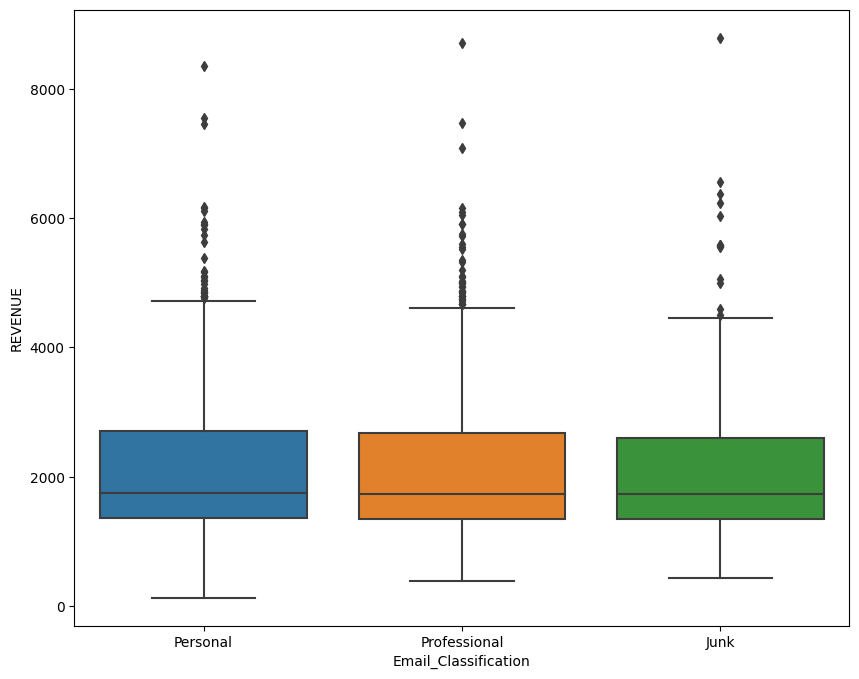

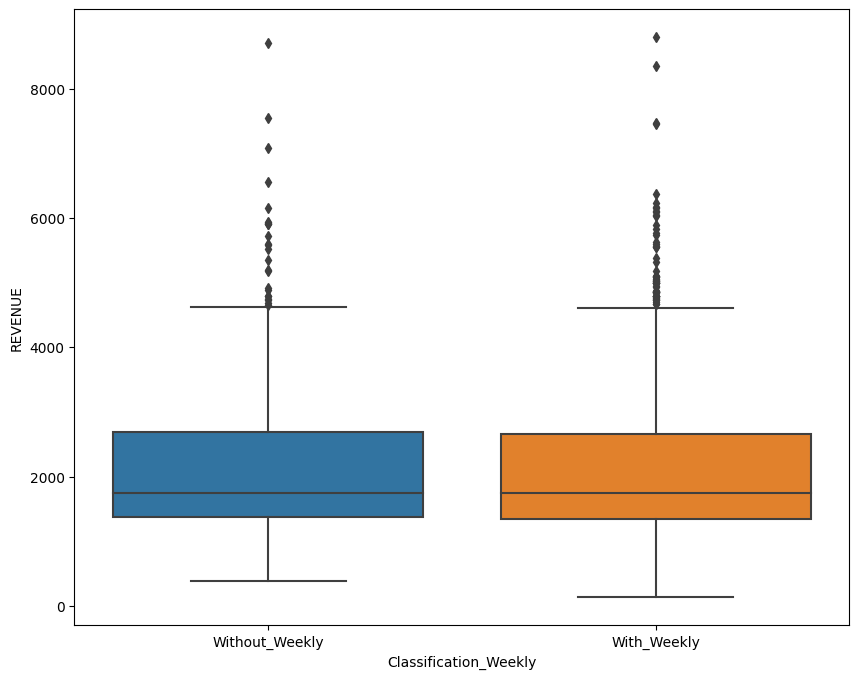

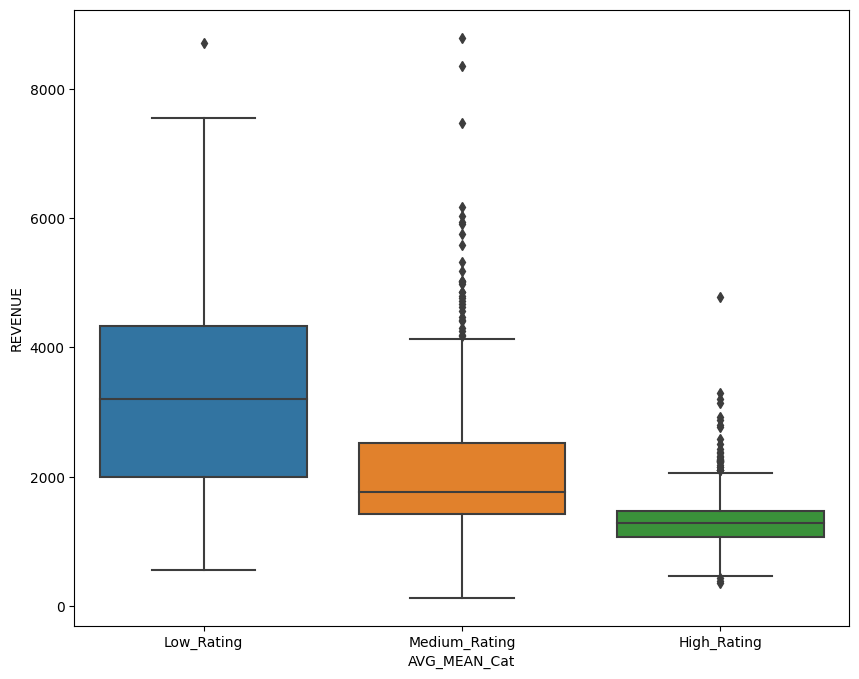

In [30]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = cat_var,
                y    = response,
                data = data)
    
    plt.suptitle("")
    plt.show()
# calling the function for Email_Classification
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'Email_Classification',
					 data     = chef)


# calling the function for Classification_Weekly
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'Classification_Weekly',
					 data     = chef)


# calling the function for AVG_MEAN_Cat
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'AVG_MEAN_Cat',
					 data     = chef)    
    

<h4>Observation</h4>
Email domains from clients can provide insight on which customers are more likely to engage more with their emails. For example, if the email used for subscription is a junk email, chances are this customer might not look at the in box as often as we would like, as opposed to a professional email address where the customer might be looking at it multiple times a day. This can affect revenue since clients might order a meal after seeing an advertisement or a discount.
<br>
Classification by weekly subscriptions can also affect revenue. For instance, those without weekly subscription would be getting more discounts than those without weekly subscriptions and thus bringing disparity in revenue.
<br>
Lastly, rating classification. The type of rating in each meal can impact the customer's choice when purchasing his or her meals.

In [31]:
# one hot encoding categorical variables
one_hot_Email = pd.get_dummies(chef['Email_Classification'])
one_hot_Weekly = pd.get_dummies(chef['Classification_Weekly'])
one_hot_Rating = pd.get_dummies(chef['AVG_MEAN_Cat'])
# dropping categorical variables after they've been encoded
chef = chef.drop('Email_Classification', axis = 1)
chef = chef.drop('Classification_Weekly', axis = 1)
chef = chef.drop('AVG_MEAN_Cat', axis = 1)

# joining codings together
chef = chef.join([one_hot_Email,one_hot_Weekly,one_hot_Rating])

In [32]:
# checking results
chef.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,...,log_Avg_Photos_PerCategory,Email_Domain,Junk,Personal,Professional,With_Weekly,Without_Weekly,High_Rating,Low_Rating,Medium_Rating
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,...,3.819908,yahoo.com,0,1,0,0,1,0,1,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,...,4.730333,visa.com,0,0,1,0,1,0,1,0
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,...,3.590439,protonmail.com,0,1,0,1,0,0,0,1
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,...,5.342334,yahoo.com,0,1,0,0,1,0,0,1
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,...,2.856470,jnj.com,0,0,1,1,0,0,0,1


<h4>Building Predictive Models</h4>
<br>
1. Analyzing the Pearson correlations with the Y-variable(s).
<br>
2. Checking for which of the y_variables revenue and log_revenue has the highest variables(x).
<br>
3. Making a copy of the chef dataset, dropping discrete and irrelevant data, and naming it chef_explanatory.
<br>
4. Creating a regression model with my dataset, modifying the result to produce a predictive model with both my y_variables separately with a condition that the highest r_squared is achieved when my p_value is below 0.05.

In [33]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE
df_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                ascending = False)

,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
AVG_TIME_PER_SITE_VISIT,0.64,0.65
Orders_For_The_Period,0.64,0.62
log_Orders_For_The_Period,0.64,0.72
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
Total_Time_in_Sites,0.62,0.62
log_TOTAL_MEALS_ORDERED,0.61,0.69
log_Total_Time_in_Sites,0.60,0.64
TOTAL_MEALS_ORDERED,0.60,0.61


In [34]:
# subsetting for revenue
revenue_corr = df_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                 ascending = False)


# removing irrelevant correlations
revenue_corr = revenue_corr.iloc[ 2: , :]


# placeholder column for y-variable recommendation
revenue_corr['recommended'] = 0


# filling in placeholder
for index, column in revenue_corr.iterrows():
    
    # if revenue is higher
    if abs(revenue_corr.loc[ index, 'REVENUE']) >  abs(revenue_corr.loc[ index, 'log_REVENUE']):
        revenue_corr.loc[ index , 'recommended'] = 'REVENUE'
        
        
    # if log_revenue is higher 
    elif abs(revenue_corr.loc[ index, 'REVENUE']) <  abs(revenue_corr.loc[ index, 'log_REVENUE']):
        revenue_corr.loc[ index , 'recommended'] = 'log_REVENUE'
    
    
    # in case they are tied
    else:
        revenue_corr.loc[ index , 'recommended'] = 'Tie'
        

# checking results
revenue_corr["recommended"].value_counts(normalize = True,
                                       sort      = True,
                                       ascending = False).round(decimals = 2)

log_REVENUE    0.38
Tie            0.38
REVENUE        0.25
Name: recommended, dtype: float64

In [35]:
#cleaning late deliveries and forming a new column without the space
chef['LATE_DELIVERIES'] = chef['LATE_DELIVERIES ']

In [36]:
# making a copy of chef
chef_explanatory = chef.copy()


# dropping Revenue, NAME', 'FIRST_NAME', 'FAMILY_NAME, EMAIL from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['REVENUE',
                                    'log_REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL', 'Email_Domain', 'LATE_DELIVERIES '], axis = 1)


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(f"{val} +")

TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_AFTER_NOON +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
TOTAL_PHOTOS_VIEWED +
Total_Prep_Time_InOrders +
Total_Time_InPhotos +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
log_TOTAL_PHOTOS_VIEWED +
log_Total_Time_InPhotos +
log_Total_Prep_Time_InOrders +
Total_Logins +
Total_Time_in_Sites +
Orders_For_The_Period +
Avg_Unique_Orders +
Avg_Photos_PerCategory +
log_Total_Logins +
log_Total_Time_in_Sites +
log_Orders_For_The_Period +
log_Avg_Unique_Orders +
log_Avg_Photos_PerCategory +
Junk +
Personal +
Professional +
With_Weekly +
Without_Weekly +
High_Rating +
Low_Rating +
Medium_Rating +
LATE_DELIVERIES +


In [37]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """REVENUE ~
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_AFTER_NOON +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
TOTAL_PHOTOS_VIEWED +
Total_Prep_Time_InOrders +
Total_Time_InPhotos +
Total_Logins +
Total_Time_in_Sites +
Orders_For_The_Period +
Avg_Unique_Orders +
Avg_Photos_PerCategory +
Junk +
Personal +
Professional +
With_Weekly +
Without_Weekly +
High_Rating +
Low_Rating +
Medium_Rating +
LATE_DELIVERIES
                                            """,
                                data = chef)

                        

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:14   Log-Likelihood:                -15411.
No. Observations:                1946   AIC:                         3.087e+04
Df Residuals:                    1920   BIC:                         3.102e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1181.2374    225.828      5.231      0.000     738.344    1624.131
TOTAL_MEALS_ORDERED             3.6092      1.050      3.438      0.001       1.551       5.668
UNIQUE_MEALS_PURCH            -24.0602      8.995     -2.675      0.008     -41.700      -6.420
CONTACTS_W_CUSTOMER_SERVICE    83.7175      6.234     13.430      0.000      71.492      95.943
PRODUCT_CATEGORIES_VIEWED       8.3291      5.601      1.487      0.137      -2.655      19.313
AVG_TIME_PER_SITE_VISIT         0.9841      2.796      0.352      0.725      -4.499       6.467
CANCELLATIONS_AFTER_NOON       -5.9889      9.463     -0.633      0.527     -24.548      12.571
PC_LOGINS                     -94.3753     28.134     -3.355      0.001    -149.551     -39.199
MOBILE_LOGINS                 -39.3345     28.860     -1.363      0.173     -95.935      17.266
WEEKLY_PLAN                     0.4368      1.276      0.342      0.732      -2.065       2.939
AVG_PREP_VID_TIME              -0.2769      0.451     -0.614      0.539      -1.161       0.607
LARGEST_ORDER_SIZE           -139.2675     22.423     -6.211      0.000    -183.243     -95.292
AVG_MEAN_RATING              -201.6873     57.874     -3.485      0.001    -315.189     -88.186
TOTAL_PHOTOS_VIEWED             1.6703      0.300      5.576      0.000       1.083       2.258
Total_Prep_Time_InOrders        0.0017      0.005      0.316      0.752      -0.009       0.012
Total_Time_InPhotos            -0.0058      0.001     -4.257      0.000      -0.009      -0.003
Total_Logins                 -133.7098     41.158     -3.249      0.001    -214.428     -52.991
Total_Time_in_Sites             1.5124      0.392      3.862      0.000       0.744       2.280
Orders_For_The_Period           1.7522      0.232      7.558      0.000       1.298       2.207
Avg_Unique_Orders              -9.6908      1.011     -9.587      0.000     -11.673      -7.708
Avg_Photos_PerCategory          0.4089      0.314      1.300      0.194      -0.208       1.026
Junk                          392.9214     79.631      4.934      0.000     236.750     549.093
Personal                      400.6745     77.899      5.143      0.000     247.898     553.451
Professional                  387.6415     78.403      4.944      0.000     233.878     541.405
With_Weekly                   558.4974    115.072      4.853      0.000     332.819     784.176
Without_Weekly                622.7400    114.338      5.446      0.000     398.500     846.980
High_Rating                   307.8206    107.530      2.863      0.004      96.933     518.708
Low_Rating                    588.0436     78.711      7.471      0.000     433.676     742.412
Medium_Rating                 285.3731     78.510      3.635      0.000     131.399     439.347
LATE_DELIVE

In [38]:
# building a full model
#Adjusted R-square of 0.825 or higher
#All p-values in model < 0.05
# blueprinting a model type
lm_full = smf.ols(formula = """REVENUE ~ TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PC_LOGINS +
MOBILE_LOGINS +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
TOTAL_PHOTOS_VIEWED +
Total_Time_InPhotos +
Total_Logins +
Total_Time_in_Sites +
Orders_For_The_Period +
Avg_Unique_Orders +
Junk +
Personal +
Professional +
With_Weekly +
Without_Weekly +
High_Rating +
Low_Rating +
Medium_Rating
                                            """,
                                data = chef)

                        

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     217.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:14   Log-Likelihood:                -15412.
No. Observations:                1946   AIC:                         3.086e+04
Df Residuals:                    1928   BIC:                         3.096e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1253.5315    132.160      9.485      0.000     994.340    1512.723
TOTAL_MEALS_ORDERED             3.7228      0.982      3.790      0.000       1.796       5.649
UNIQUE_MEALS_PURCH            -25.2198      8.948     -2.818      0.005     -42.769      -7.671
CONTACTS_W_CUSTOMER_SERVICE    84.3734      6.145     13.731      0.000      72.323      96.424
PC_LOGINS                    -101.6079     20.694     -4.910      0.000    -142.193     -61.022
MOBILE_LOGINS                 -45.1520     21.554     -2.095      0.036     -87.423      -2.881
LARGEST_ORDER_SIZE           -138.7489     21.725     -6.387      0.000    -181.356     -96.141
AVG_MEAN_RATING              -199.6599     57.673     -3.462      0.001    -312.767     -86.553
TOTAL_PHOTOS_VIEWED             1.8123      0.273      6.627      0.000       1.276       2.349
Total_Time_InPhotos            -0.0059      0.001     -4.431      0.000      -0.009      -0.003
Total_Logins                 -146.7599     15.527     -9.452      0.000    -177.211    -116.309
Total_Time_in_Sites             1.6443      0.090     18.309      0.000       1.468       1.820
Orders_For_The_Period           1.7806      0.222      8.018      0.000       1.345       2.216
Avg_Unique_Orders              -9.8193      1.003     -9.791      0.000     -11.786      -7.852
Junk                          416.0866     51.481      8.082      0.000     315.122     517.051
Personal                      424.8870     48.318      8.794      0.000     330.125     519.648
Professional                  412.5579     48.868      8.442      0.000     316.719     508.397
With_Weekly                   597.7547     67.613      8.841      0.000     465.151     730.358
Without_Weekly                655.7768     69.243      9.471      0.000     519.979     791.575
High_Rating                   331.4727     90.108      3.679      0.000     154.753     508.192
Low_Rating                    613.7092     47.735     12.856      0.000     520.091     707.328
Medium_Rating                 308.3496     47.983      6.426      0.000     214.245     402.454
==============================================================================
Omnibus:                      773.428   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8639.975
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                      12.848   Cond. No.                     2.52e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.18e-29. This might indicate that there are
strong multicollinearity problems

In [39]:
# building a full model
#log_revenue
# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
log_TOTAL_PHOTOS_VIEWED +
log_Total_Time_InPhotos +
log_Total_Prep_Time_InOrders +
log_Total_Logins +
log_Total_Time_in_Sites +
log_Orders_For_The_Period +
log_Avg_Unique_Orders +
log_Avg_Photos_PerCategory +
Junk +
Personal +
Professional +
With_Weekly +
Without_Weekly +
High_Rating +
Low_Rating +
Medium_Rating
                                            """,
                                data = chef)

                        

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:14   Log-Likelihood:                -188.44
No. Observations:                1946   AIC:                             414.9
Df Residuals:                    1927   BIC:                             520.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4127      0.102     13.842      0.000       1.213       1.613
UNIQUE_MEALS_PURCH              -0.0455      0.014     -3.310      0.001      -0.072      -0.019
CONTACTS_W_CUSTOMER_SERVICE      0.0301      0.003     11.905      0.000       0.025       0.035
PRODUCT_CATEGORIES_VIEWED        0.0248      0.007      3.568      0.000       0.011       0.038
LARGEST_ORDER_SIZE              -0.0353      0.015     -2.355      0.019      -0.065      -0.006
AVG_MEAN_RATING                 -0.1003      0.023     -4.337      0.000      -0.146      -0.055
log_AVG_TIME_PER_SITE_VISIT      0.3465      0.024     14.423      0.000       0.299       0.394
log_AVG_PREP_VID_TIME           -0.1272      0.023     -5.604      0.000      -0.172      -0.083
log_TOTAL_MEALS_ORDERED          0.2212      0.042      5.218      0.000       0.138       0.304
log_TOTAL_PHOTOS_VIEWED         -0.2083      0.022     -9.424      0.000      -0.252      -0.165
log_Total_Time_InPhotos          0.1381      0.016      8.568      0.000       0.107       0.170
log_Total_Prep_Time_InOrders     0.0940      0.022      4.324      0.000       0.051       0.137
log_Total_Logins                -0.1553      0.035     -4.432      0.000      -0.224      -0.087
log_Total_Time_in_Sites          0.1911      0.023      8.281      0.000       0.146       0.236
log_Orders_For_The_Period        0.3692      0.106      3.476      0.001       0.161       0.577
log_Avg_Unique_Orders           -0.4161      0.090     -4.613      0.000      -0.593      -0.239
log_Avg_Photos_PerCategory       0.0995      0.030      3.316      0.001       0.041       0.158
Junk                             0.4697      0.036     13.176      0.000       0.400       0.540
Personal                         0.4815      0.035     13.758      0.000       0.413       0.550
Professional                     0.4616      0.035     13.185      0.000       0.393       0.530
With_Weekly                      0.6942      0.051     13.513      0.000       0.593       0.795
Without_Weekly                   0.7185      0.052     13.904      0.000       0.617       0.820
High_Rating                      0.4546      0.045     10.055      0.000       0.366       0.543
Low_Rating                       0.5255      0.036     14.650      0.000       0.455       0.596
Medium_Rating                    0.4326      0.035     12.254      0.000       0.363       0.502
==============================================================================
Omnibus:                      125.133   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.403
Skew:                          -0.210   Prob(JB):                    1.06e-100
Kurtosis:                       5.346   Cond. No.  

<h4>Observation</h4>
A lot of statistically insignificant variables that might not be necessary in our model.
<br>
Improved adjusted r-squared: New Features created helped explain REVENUE better.


<h4>Developing Candidate Models</h4>
<br>
Now let’s run our model on sklearn models and get the model with the least gap between the training and testing score.
<br>
Preparation:
<br>
<br>
random state: 219
<br>
test size: 0.25
<br>
features: orignial and engineered features
<br>
y_variables: revenue, log_revenue

In [40]:
# x-variables for normal y Revenue
x_var = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PC_LOGINS',
'MOBILE_LOGINS',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'TOTAL_PHOTOS_VIEWED',
'Total_Time_InPhotos',
'Total_Logins',
'Total_Time_in_Sites',
'Orders_For_The_Period',
'Avg_Unique_Orders',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating']
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var]
# preparing response variable
y_data      = chef['REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables
            y_data, # y-variables
            test_size    = 0.25,
            random_state = 219)
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
# Setting a model name
model_name = "Linear Regression (y-REVENUE)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


Linear Regression (y-REVENUE)

Training Score :  0.6537
Testing Score  :  0.6621
Train-Test Gap :  0.0084


In [41]:

# x-variables for log_Revenue
x_var_log_y = [
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'log_AVG_TIME_PER_SITE_VISIT',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'log_TOTAL_PHOTOS_VIEWED',
'log_Total_Time_InPhotos',
'log_Total_Prep_Time_InOrders',
'log_Total_Logins',
'log_Total_Time_in_Sites',
'log_Orders_For_The_Period',
'log_Avg_Unique_Orders',
'log_Avg_Photos_PerCategory',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating'    
]
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var_log_y]
# preparing response variable
y_data      = chef['log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
# Setting a model name
model_name = "Linear Regression (y-log_REVENUE)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


Linear Regression (y-log_REVENUE)

Training Score :  0.6986
Testing Score  :  0.7019
Train-Test Gap :  0.0033


In [42]:
# x-variables for normal y Revenue
x_var = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PC_LOGINS',
'MOBILE_LOGINS',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'TOTAL_PHOTOS_VIEWED',
'Total_Time_InPhotos',
'Total_Logins',
'Total_Time_in_Sites',
'Orders_For_The_Period',
'Avg_Unique_Orders',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating']
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var]
# preparing response variable
y_data      = chef['REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables
            y_data, # y-variables
            test_size    = 0.25,
            random_state = 219)

# importing machine learning model
from sklearn.ensemble import GradientBoostingRegressor # gbm
model_name = "GradientBoostingRegressor (y-REVENUE)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.09,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 1,
                                  min_samples_leaf=70,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


GradientBoostingRegressor (y-REVENUE)

Training Score :  0.7264
Testing Score  :  0.6806
Train-Test Gap :  0.0458


In [43]:
# x-variables for log_Revenue
x_var_log_y = [
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'log_AVG_TIME_PER_SITE_VISIT',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'log_TOTAL_PHOTOS_VIEWED',
'log_Total_Time_InPhotos',
'log_Total_Prep_Time_InOrders',
'log_Total_Logins',
'log_Total_Time_in_Sites',
'log_Orders_For_The_Period',
'log_Avg_Unique_Orders',
'log_Avg_Photos_PerCategory',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating'    
]
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var_log_y]
# preparing response variable
y_data      = chef['log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# importing machine learning model
from sklearn.ensemble import GradientBoostingRegressor # gbm
model_name = "GradientBoostingRegressor (y-log_REVENUE)"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.09,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 1,
                                  min_samples_leaf=70,
                                  warm_start    = False,
                                  random_state  = 219)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


GradientBoostingRegressor (y-log_REVENUE)

Training Score :  0.7808
Testing Score  :  0.7595
Train-Test Gap :  0.0213


In [44]:
# x-variables for normal y Revenue
x_var = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PC_LOGINS',
'MOBILE_LOGINS',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'TOTAL_PHOTOS_VIEWED',
'Total_Time_InPhotos',
'Total_Logins',
'Total_Time_in_Sites',
'Orders_For_The_Period',
'Avg_Unique_Orders',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating']
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var]
# preparing response variable
y_data      = chef['REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables
            y_data, # y-variables
            test_size    = 0.25,
            random_state = 219)

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm
model_name = "RandomForestRegressor (y-REVENUE)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = "squared_error",
                              max_depth        = 12,
                              min_samples_leaf = 25,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


RandomForestRegressor (y-REVENUE)

Training Score :  0.7403
Testing Score  :  0.7056
Train-Test Gap :  0.0347


In [45]:
# x-variables for log_Revenue
x_var_log_y = [
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'AVG_MEAN_RATING',
'log_AVG_TIME_PER_SITE_VISIT',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'log_TOTAL_PHOTOS_VIEWED',
'log_Total_Time_InPhotos',
'log_Total_Prep_Time_InOrders',
'log_Total_Logins',
'log_Total_Time_in_Sites',
'log_Orders_For_The_Period',
'log_Avg_Unique_Orders',
'log_Avg_Photos_PerCategory',
'Junk',
'Personal',
'Professional',
'With_Weekly',
'Without_Weekly',
'High_Rating',
'Low_Rating',
'Medium_Rating'    
]
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var_log_y]
# preparing response variable
y_data      = chef['log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm
model_name = "RandomForestRegressor (y-log_REVENUE)"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = "squared_error",
                              max_depth        = 12,
                              min_samples_leaf = 25,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
{model_name}

Training Score :  {model_train_score}
Testing Score  :  {model_test_score}
Train-Test Gap :  {model_gap}""")


RandomForestRegressor (y-log_REVENUE)

Training Score :  0.8082
Testing Score  :  0.7804
Train-Test Gap :  0.0278


<h4>Observation</h4>
Linear model provides a slightly lower score with features selected on both revenue and log_revenue. The remaining provides a higher score. However, RandomForestRegressor provides powerful business insights. It has a higher training and testing scores and the gap is minimal. This minimizes the effects of data discrepancies and gives a better understanding of the model features. We need to make sure we are meeting all the assumptions necessary of a before considering our model so that it can give us a good prediction.
<br>
<br>
<h4>Conclusion</h4>
Identifying which customers belong to a group such as working class customers,professional emails, and not working class, junk and personal, a targeted campaigns on emails or social media can improve number of orders. For example, sending email on meal discounts for working class group when it is almost lunch time can increase their orders since they constantly look at emails when at work.
<br>
Data for customer service calls is insufficient but it can be used to retain customers because of the high competitive market of this field. We should be able to identify if a customer service call was a complaint or not. This provides extremely valuable insight on how a customer complaint affects our revenue, which would indirectly increase revenue by evaluating and offering a better solution to the customer.
<br>
<br>
<h4>Reference</h4>
<div class="csl-entry"><i>The Decline of Home Cooking: Why More People Are Choosing to Eat Out - On the Line | Toast POS</i>. (n.d.). Retrieved February 18, 2023, from https://pos.toasttab.com/blog/on-the-line/why-more-people-are-choosing-to-eat-out</div>
<div class="csl-entry"><i>Purchasing – Basic Kitchen and Food Service Management</i>. (n.d.). Retrieved February 18, 2023, from https://opentextbc.ca/basickitchenandfoodservicemanagement/chapter/purchasing/</div>
<div class="csl-entry">Committee, T. B. C. A. (2015). <i>Purchasing</i>. BCcampus.</div>